#### 影响股指期货基差收敛速度的主要因素
- 成分股分红：造成现货价格下调。
- 当前合约的年化基差水平：由于到期日基差会收敛至0，因此当前基差越负，未来基差收敛速度可能越快，该因素最为重要。
- 指数的预期收益：基差的变动与市场情绪有关。
- 不同月份合约的基差结构：近远月合约年化基差若相差超过一定水平，市场会存在套利空间，因此基差的期限结构可能呈现均值回复特点。

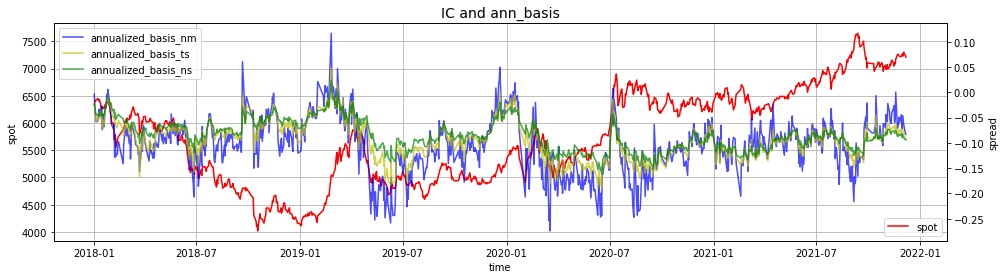

In [1]:
import warnings
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime as dt

ICprice = pd.read_csv('./ICdata.csv')
# 基差=期货价格-现货价格
ICprice['base_sprd'] = ICprice['close'] - ICprice['spot']
# 年化基差=基差/现货价格*360/期货剩余天数
ICprice['base_sprd_ann'] = ICprice['base_sprd'] / ICprice['spot'] * 360 / ICprice['ttm_days']

 # flag：当月为0，次月为1，季月为2，下季月为3
# 取出次月合约
flag1 = ICprice[ICprice['flag'] == 1]
flag1['date'] = flag1['date'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
flag1.set_index(['date'], inplace=True)
# 季月
flag2 = ICprice[ICprice['flag'] == 2]
flag2['date'] = flag2['date'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
flag2.set_index(['date'], inplace=True)
# 下季月
flag3 = ICprice[ICprice['flag'] == 3]
flag3['date'] = flag3['date'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
flag3.set_index(['date'], inplace=True)
# 画图
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.plot(flag1['spot'], label='spot', color='r')
plt.grid(True)
plt.legend(loc='lower right')
ax2 = ax.twinx()
ax2.plot(flag1['base_sprd_ann'],label='annualized_basis_nm', color='b', alpha=0.7)
ax2.plot(flag2['base_sprd_ann'],label='annualized_basis_ts', color='y', alpha=0.7)
ax2.plot(flag3['base_sprd_ann'],label='annualized_basis_ns', color='g', alpha=0.7)
#plt.axhline(y=flag1['base_sprd_ann'].mean(), color="green", linestyle="--", label='basis_ann_mean: %s' % str(round(flag1['base_sprd_ann'].mean(),3)))
ax.set_xlabel('time')
ax.set_ylabel('spot')
ax2.set_ylabel('spread')
ax.set_title('IC and ann_basis', fontsize=14)
plt.legend(loc='upper left')
plt.show()

上图可知，中证500股指期货合约基差长期处于贴水状态

1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     234.2
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.41e-51
Time:                        21:47:52   Log-Likelihood:                -6533.4
No. Observations:                3769   AIC:                         1.307e+04
Df Residuals:                    3767   BIC:                         1.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2050      0.031     -6.672      0

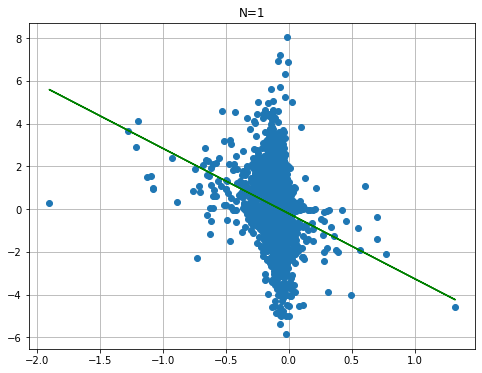

2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     263.7
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.43e-57
Time:                        21:47:52   Log-Likelihood:                -4440.2
No. Observations:                3718   AIC:                             8884.
Df Residuals:                    3716   BIC:                             8897.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1267      0.020     -6.286      0

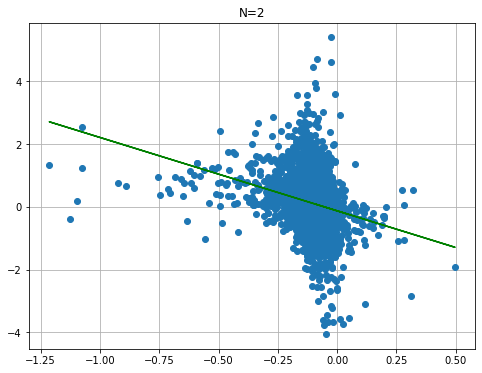

3
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     395.1
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.42e-83
Time:                        21:47:52   Log-Likelihood:                -3293.4
No. Observations:                3667   AIC:                             6591.
Df Residuals:                    3665   BIC:                             6603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1358      0.016     -8.363      0

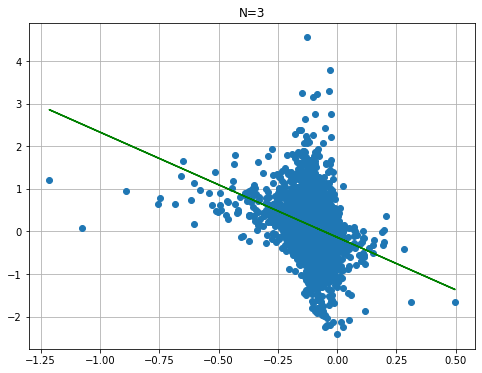

4
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     481.7
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          2.44e-100
Time:                        21:47:52   Log-Likelihood:                -2501.6
No. Observations:                3616   AIC:                             5007.
Df Residuals:                    3614   BIC:                             5020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1278      0.014     -9.198      0

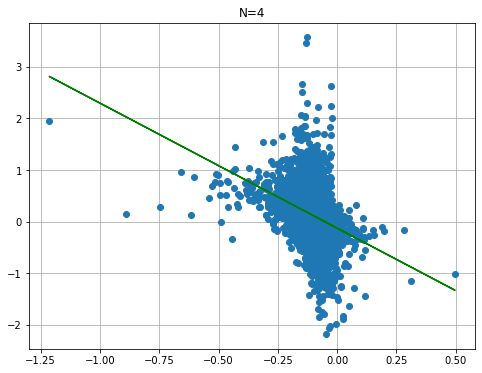

5
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     565.4
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          4.00e-116
Time:                        21:47:52   Log-Likelihood:                -1834.8
No. Observations:                3565   AIC:                             3674.
Df Residuals:                    3563   BIC:                             3686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1345      0.013    -10.586      0

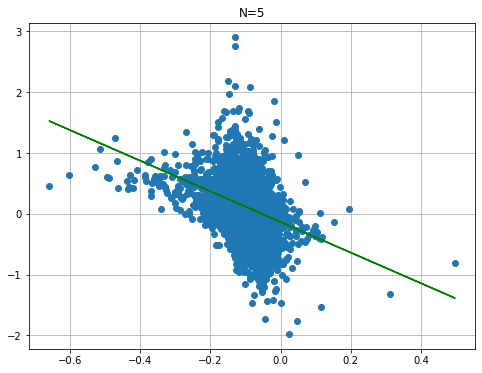

6
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     651.8
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          4.92e-132
Time:                        21:47:52   Log-Likelihood:                -1340.5
No. Observations:                3514   AIC:                             2685.
Df Residuals:                    3512   BIC:                             2697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1280      0.011    -11.157      0

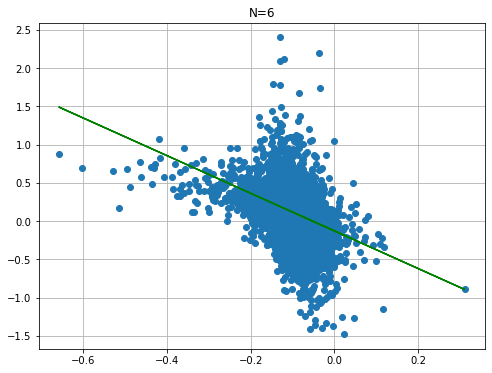

7
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     736.9
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          2.81e-147
Time:                        21:47:53   Log-Likelihood:                -968.45
No. Observations:                3463   AIC:                             1941.
Df Residuals:                    3461   BIC:                             1953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1283      0.011    -11.975      0

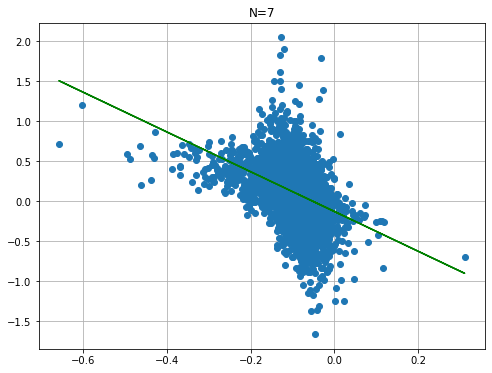

8
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     811.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          2.49e-160
Time:                        21:47:53   Log-Likelihood:                -619.19
No. Observations:                3412   AIC:                             1242.
Df Residuals:                    3410   BIC:                             1255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1290      0.010    -12.753      0

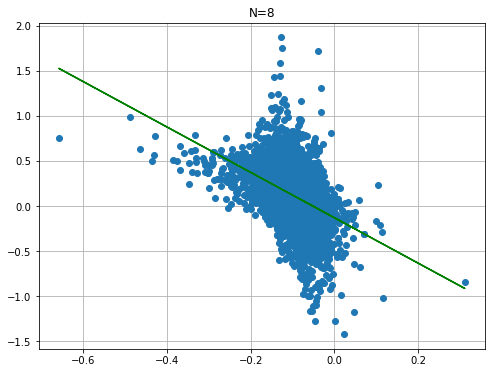

9
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     864.1
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          3.16e-169
Time:                        21:47:53   Log-Likelihood:                -327.36
No. Observations:                3361   AIC:                             658.7
Df Residuals:                    3359   BIC:                             671.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1259      0.010    -13.117      0

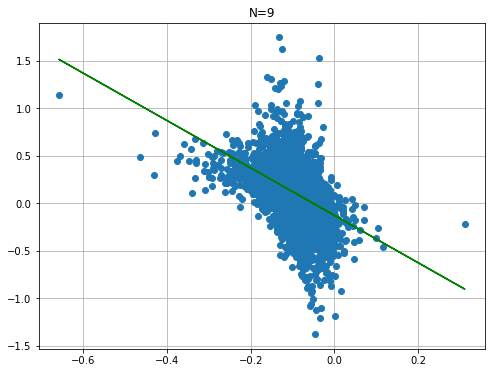

10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     946.8
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          4.65e-183
Time:                        21:47:53   Log-Likelihood:                -75.730
No. Observations:                3310   AIC:                             155.5
Df Residuals:                    3308   BIC:                             167.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1328      0.009    -14.271      

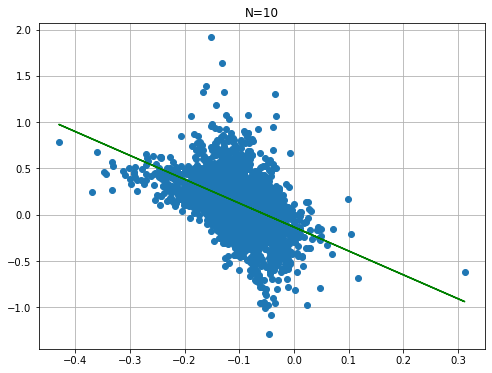

11
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     993.3
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          1.59e-190
Time:                        21:47:53   Log-Likelihood:                 136.29
No. Observations:                3259   AIC:                            -268.6
Df Residuals:                    3257   BIC:                            -256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1288      0.009    -14.427      

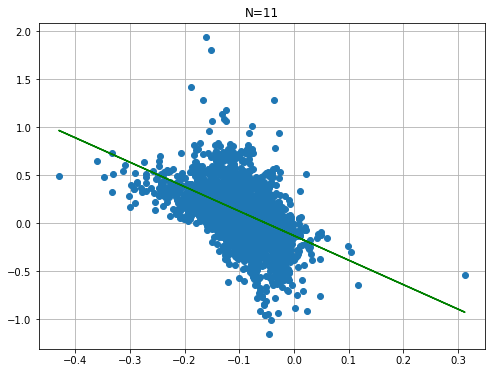

12
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     1049.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          2.36e-199
Time:                        21:47:53   Log-Likelihood:                 347.58
No. Observations:                3208   AIC:                            -691.2
Df Residuals:                    3206   BIC:                            -679.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1255      0.009    -14.703      

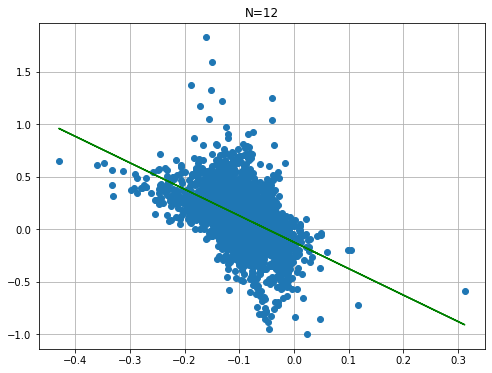

13
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     1105.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          5.12e-208
Time:                        21:47:53   Log-Likelihood:                 551.32
No. Observations:                3158   AIC:                            -1099.
Df Residuals:                    3156   BIC:                            -1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1212      0.008    -14.883      

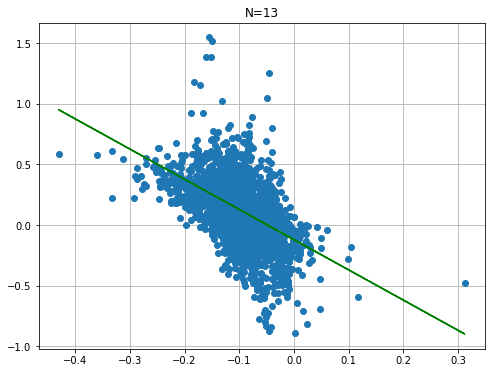

14
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     1157.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          7.67e-216
Time:                        21:47:54   Log-Likelihood:                 726.47
No. Observations:                3108   AIC:                            -1449.
Df Residuals:                    3106   BIC:                            -1437.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1188      0.008    -15.117      

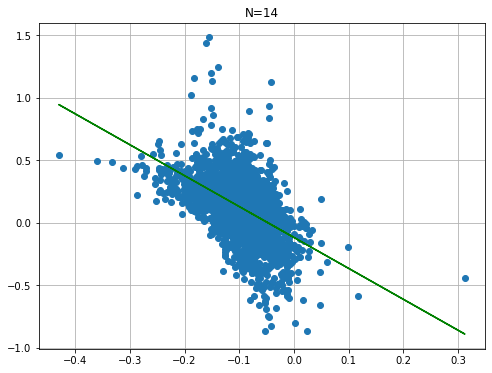

In [60]:
# Part1: 当前合约的年化基差：当前基差贴水程度越大，基差收敛越快

# N个交易日后的基差
def get_next_basis(df, N):
    df.sort_values(['date'], inplace=True)
    df['next_base_sprd'] = df['base_sprd'].shift(-N)
    return df

param_dict = {}
# N取1-14日
for i in range(14):
    print(i+1)
    temp = []
    # N日后基差
    ICprice_next = ICprice.groupby(['code']).apply(get_next_basis, i+1)
    # N日基差平均收敛率=（N个交易日后基差-当前基差）*360/（当前指数价格*N）
    ICprice_next['converge'] = (ICprice_next['next_base_sprd'] - ICprice_next['base_sprd']) * 360 / (ICprice_next['spot'] * (i+1))
    #删除inf与nan值
    price_select = ICprice_next.replace(np.inf, np.nan)
    price_select = price_select.replace(-np.inf, np.nan)
    price_select.dropna(axis=0, inplace=True)

    x = np.array(list(price_select['base_sprd_ann'])).reshape((-1, 1))
    y = np.array(list(price_select['converge']))

    # 回归建模
    X = sm.add_constant(x)
    results = sm.OLS(y, X).fit()
    print(results.summary())
    temp.append(results.rsquared)
    temp.append(results.params[1])
    temp.append(results.tvalues[1])
    temp.append(results.pvalues[1])
    param_dict[i+1] = temp
    predictions = x*results.params[1]+results.params[0]

    # 画图
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(np.array(list(price_select['base_sprd_ann'])).reshape((-1, 1)), np.array(list(price_select['converge'])), 'o', label='data')
    ax.plot(price_select['base_sprd_ann'], predictions, c='g')
    plt.title(f"""N={i+1}""")
    plt.grid(True)
    plt.show()

param_df = pd.DataFrame.from_dict(param_dict, orient='index', columns=['R_squared', 'coef', 't_value', 'p_value'])

In [38]:
param_df

,R_squared,coef,t_value,p_value
1,0.058543,-3.049469,-15.305017,2.409016e-51
2,0.066259,-2.336652,-16.238567,2.427548e-57
3,0.097306,-2.468163,-19.876391,1.420431e-83
4,0.117618,-2.424335,-21.948440,2.442861e-100
5,0.136953,-2.520345,-23.778060,4.002575e-116
6,0.156550,-2.458148,-25.531347,4.915454e-132
7,0.175532,-2.480483,-27.145137,2.807469e-147
8,0.192255,-2.511227,-28.489104,2.487439e-160
9,0.204618,-2.492885,-29.396046,3.161585e-169
10,0.222520,-2.580152,-30.769691,4.651734e-183


分析：上表的数据显示，当前合约年化基差与该合约在 N 日的平均收敛率呈显著负相关，对于该线性回归结果， t 检验和 p 检验都显著，且拟合优度 R2 结果随着天数 N 的增加而持续增加。
结论：当前合约的年化基差越约小，即贴水程度越大，其基差收敛越快。同理，基差贴水程度越小，其收敛越慢。

In [61]:
# 指数的收益率：指数未来上涨时， 期指基差收敛加快，反之亦然
# 指数 N 天后价格
def get_next_spot(df, N):
    df.sort_values(['date'], inplace=True)
    df['next_spot'] = df['spot'].shift(-N)
    return df

param_dict = {}

for i in range(14):
    print(i+1)
    temp = []
    ICprice_next = ICprice.groupby(['code']).apply(get_next_basis, i + 1)
    ICprice_next = ICprice_next.groupby(['code']).apply(get_next_spot, i + 1)
    # N日基差平均收敛率=（N个交易日后基差-当前基差）*360/（当前指数价格*N）
    ICprice_next['converge'] = (ICprice_next['next_base_sprd'] - ICprice_next['base_sprd']) * 360 / (ICprice_next['spot'] * (i + 1))
    # 指数未来 N 天收益率=(指数 N 天后价格-指数当前价格)/指数当前价格
    ICprice_next['fut_return'] = (ICprice_next['next_spot'] - ICprice_next['spot']) / (ICprice_next['spot'])

    # 创建哑变量
    ICprice_next['flag1'] = ICprice_next['flag'].apply(lambda x: 1 if x==0 else 0)
    ICprice_next['flag2'] = ICprice_next['flag'].apply(lambda x: 1 if x==1 else 0)
    ICprice_next['flag3'] = ICprice_next['flag'].apply(lambda x: 1 if x==2 else 0)
    ICprice_next['flag4'] = ICprice_next['flag'].apply(lambda x: 1 if x==3 else 0)
    # 𝐍日基差平均收敛率 = 𝒂𝟏 × 指数未来𝐍天收益率 × 𝑫𝟏 + 𝒂𝟐 × 指数未来𝐍天收益率 × 𝑫𝟐 
    # + 𝒂𝟑 × 指数未来𝐍天收益率 × 𝑫𝟑 + 𝒂𝟒 × 指数未来𝐍天收益率 × 𝑫𝟒
    ICprice_next['x1'] = ICprice_next['flag1'] * ICprice_next['fut_return']
    ICprice_next['x2'] = ICprice_next['flag2'] * ICprice_next['fut_return']
    ICprice_next['x3'] = ICprice_next['flag3'] * ICprice_next['fut_return']
    ICprice_next['x4'] = ICprice_next['flag4'] * ICprice_next['fut_return']
    #删除inf和nan值
    price_select = ICprice_next.replace(np.inf, np.nan)
    price_select = price_select.replace(-np.inf, np.nan)
    price_select.dropna(axis=0, inplace=True)

    x = price_select[['x1', 'x2', 'x3', 'x4']].values
    y = np.array(list(price_select['converge']))

    # 建立回归模型
    X = sm.add_constant(x)
    results = sm.OLS(y, X).fit()
    print(results.summary())

    temp.append(results.rsquared)
    temp.append(results.params[1])
    temp.append(results.params[2])
    temp.append(results.params[3])
    temp.append(results.params[4])
    param_dict[i+1] = temp

param_df = pd.DataFrame.from_dict(param_dict, orient='index', columns=['R_squared', 'alpha1', 'alpha2', 'alpha3', 'alpha4'])

1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.374
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.14e-05
Time:                        21:47:56   Log-Likelihood:                -6634.4
No. Observations:                3769   AIC:                         1.328e+04
Df Residuals:                    3764   BIC:                         1.331e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1167      0.023      5.087      0

In [40]:
param_df

,R_squared,alpha1,alpha2,alpha3,alpha4
1,0.006729,2.860697,9.780370,11.023076,5.871535
2,0.011497,3.056070,5.082392,5.283737,3.534828
3,0.017197,2.282954,3.570160,3.760961,3.152311
4,0.027426,2.007135,2.908203,3.305673,3.100836
5,0.036366,1.425992,2.419127,2.972683,2.867874
6,0.044130,1.221518,2.034238,2.658592,2.654047
7,0.051822,1.098181,1.766638,2.458638,2.512446
8,0.055957,0.880881,1.495665,2.203756,2.278990
9,0.056076,0.690924,1.226270,1.929639,2.044640
10,0.052657,0.395836,1.020395,1.673790,1.794648


上表的数据显示，指数的未来 N 日收益率与该合约在 N 日的平均收敛率呈正相关性，对于该线性回归结果， R2检验结果在 N=8 至 9 天时最高，且不同到期时间的期货合约对收益率的敏感性不同，近月合约由于到期时间较短，与现货指数联动性更为紧密，对未来收益率敏感度系数最小，因此 R2 检验结果表现较差。
基于以上数据，我们得出如下结论：
指数未来上涨时，股指期货基差收敛加快，但同等条件下近月合约收敛更慢，对冲成本更低；指数未来下跌时，股指期货基差收敛变慢，同等条件下远月合约收敛更慢，对冲成本更低。

In [62]:
# 近远月合约基差的期限结构：相对年化基差越大，其基差收敛速度越慢
# 当前合约基差的期限结构=下季月合约年化基差-当前合约年化基差
def get_struct(df):
    temp = []
    df.set_index(['flag'], inplace=True)
    tmp_dict = df.to_dict(orient='dict')
    for i in range(4):
        temp.append(tmp_dict['base_sprd_ann'][3]-tmp_dict['base_sprd_ann'][i])
    df['struct'] = temp
    return df

param_dict = {}

for i in range(14):
    print(i+1)
    temp = []
    ICprice_next = ICprice.groupby(['code']).apply(get_next_basis, i+1)
    # N日基差平均收敛率=（N个交易日后基差-当前基差）*360/（当前指数价格*N）
    ICprice_next['converge'] = (ICprice_next['next_base_sprd'] - ICprice_next['base_sprd']) * 360 / (ICprice_next['spot'] * (i+1))
    ICprice_next = ICprice_next.groupby(['date']).apply(get_struct)
    ICprice_next.drop(columns = 'date', inplace=True)
    ICprice_next.reset_index(inplace=True)
    ICprice_next = ICprice_next[ICprice_next['flag'] != 3]
    #删除inf与nan值
    price_select = ICprice_next.replace(np.inf, np.nan)
    price_select = price_select.replace(-np.inf, np.nan)
    price_select.dropna(axis=0, inplace=True)

    x = np.array(list(price_select['struct'])).reshape((-1, 1))
    y = np.array(list(price_select['converge']))
    model = LinearRegression()
    model.fit(x, y)
    model = LinearRegression().fit(x, y)
    
    # 构建回归
    X = sm.add_constant(x)
    results = sm.OLS(y, X).fit()
    print(results.summary())
    temp.append(results.rsquared)
    temp.append(results.params[1])
    temp.append(results.tvalues[1])
    temp.append(results.pvalues[1])
    param_dict[i+1] = temp

param_df = pd.DataFrame.from_dict(param_dict, orient='index', columns=['R_squared', 'coef', 't_value', 'p_value'])

1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           5.49e-43
Time:                        21:48:01   Log-Likelihood:                -4718.4
No. Observations:                2815   AIC:                             9441.
Df Residuals:                    2813   BIC:                             9453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0515      0.025      2.059      0

In [46]:
param_df

,R_squared,coef,t_value,p_value
1,0.064962,2.879352,13.979814,5.493878e-43
2,0.063864,2.091046,13.729334,1.517004e-41
3,0.093847,2.265952,16.762291,4.380830e-60
4,0.107847,2.200719,17.941916,4.805924e-68
5,0.119552,2.338734,18.836298,2.564239e-74
6,0.133309,2.261840,19.855069,1.016839e-81
7,0.144994,2.299693,20.643655,1.378464e-87
8,0.152559,2.339677,21.057014,1.202650e-90
9,0.155749,2.315950,21.098686,7.969527e-91
10,0.165867,2.475378,21.676745,3.498863e-95


前合约的年化基差相对下季月合约年化基差越小，即该合约贴水幅度更高，其基差收敛速度越快；当前合约年化
基差相对下季月合约越大，即该合约贴水幅度更小，其基差收敛速度越慢。

In [77]:
param_dict = {}

for i in range(14):
    print(i+1)
    temp = []
    ICprice_next = ICprice.groupby(['code']).apply(get_next_basis, i + 1)
    ICprice_next = ICprice_next.groupby(['code']).apply(get_next_spot, i + 1)
    
    # N日基差平均收敛率=（N个交易日后基差-当前基差）*360/（当前指数价格*N）
    ICprice_next['converge'] = (ICprice_next['next_base_sprd'] - ICprice_next['base_sprd']) * 360 / (ICprice_next['spot'] * (i + 1))
    # 指数未来 N 天收益率=(指数 N 天后价格-指数当前价格)/指数当前价格
    ICprice_next['fut_return'] = (ICprice_next['next_spot'] - ICprice_next['spot']) / (ICprice_next['spot'])
    ICprice_next = ICprice_next.groupby(['date']).apply(get_struct)
    ICprice_next.drop(columns = 'date', inplace=True)
    ICprice_next.reset_index(inplace=True)
    #ICprice_next = ICprice_next[ICprice_next['flag'] != 3]
    # 创建哑变量
    ICprice_next['flag1'] = ICprice_next['flag'].apply(lambda x: 1 if x==0 else 0)
    ICprice_next['flag2'] = ICprice_next['flag'].apply(lambda x: 1 if x==1 else 0)
    ICprice_next['flag3'] = ICprice_next['flag'].apply(lambda x: 1 if x==2 else 0)
    ICprice_next['flag4'] = ICprice_next['flag'].apply(lambda x: 1 if x==3 else 0)
    ICprice_next['flag5'] = ICprice_next['flag'].apply(lambda x: 1 if x!=3 else 0)
    # 𝐍日基差平均收敛率 = 𝒂𝟏 × 当前年化基差 + 𝒂𝟐𝟏 × 指数未来𝐍天收益率 × 𝑫𝟐𝟏 + 𝒂𝟐𝟐 × 指数未来𝐍天收益率 × 𝑫𝟐𝟐
    # + 𝒂𝟐𝟑 × 指数未来𝐍天收益率 × 𝑫𝟐𝟑 + 𝒂𝟐𝟒 × 指数未来𝐍天收益率 × 𝑫𝟐𝟒 + 𝒂𝟑 × 当前合约基差的期限结构 × 𝑫𝟑
    ICprice_next['x1'] = ICprice_next['flag1'] * ICprice_next['fut_return']
    ICprice_next['x2'] = ICprice_next['flag2'] * ICprice_next['fut_return']
    ICprice_next['x3'] = ICprice_next['flag3'] * ICprice_next['fut_return']
    ICprice_next['x4'] = ICprice_next['flag4'] * ICprice_next['fut_return']
    ICprice_next['x5'] = ICprice_next['flag5'] * ICprice_next['struct']
    
    #删除inf与nan值
    price_select = ICprice_next.replace(np.inf, np.nan)
    price_select = price_select.replace(-np.inf, np.nan)
    price_select.dropna(axis=0, inplace=True)
    
    x = price_select[['base_sprd_ann','x1', 'x2', 'x3', 'x4','x5']].values
    y = np.array(list(price_select['converge']))

    # 建立回归模型
    X = sm.add_constant(x)
    results = sm.OLS(y, X).fit()
    print(results.summary())

    temp.append(results.rsquared)
    temp.append(results.params[1])
    temp.append(results.params[2])
    temp.append(results.params[3])
    temp.append(results.params[4])
    temp.append(results.params[5])
    temp.append(results.params[6])
    temp.append(results.tvalues[1])
    temp.append(results.pvalues[1])
    
    param_dict[i+1] = temp
         
param_df = pd.DataFrame.from_dict(param_dict, orient='index', columns=['R_squared', 'a1', 'a21', 'a22', 'a23','a24','a3', 't_value', 'p_value'])
    

1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     50.98
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.41e-60
Time:                        22:05:36   Log-Likelihood:                -6499.8
No. Observations:                3769   AIC:                         1.301e+04
Df Residuals:                    3762   BIC:                         1.306e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5705      0.068     -8.422      0

In [78]:
param_df

,R_squared,a1,a21,a22,a23,a24,a3,t_value,p_value
1,0.075192,-7.409267,5.867728,10.299158,11.343098,6.122765,-4.870813,-9.837998,1.442425e-22
2,0.095638,-5.822863,3.508254,5.232870,5.388826,3.616582,-4.154724,-13.176038,8.837447e-39
3,0.132804,-5.114320,2.346103,3.625398,3.783494,3.150854,-3.350544,-15.437339,3.904493e-52
4,0.166515,-4.807289,1.837664,2.887043,3.263211,3.053535,-3.159953,-17.820335,3.772522e-68
5,0.192492,-4.429698,1.219612,2.348969,2.888360,2.795704,-2.777379,-19.439385,4.446625e-80
6,0.222145,-4.256911,0.973327,1.948357,2.549207,2.564162,-2.682089,-21.345201,3.813489e-95
7,0.248630,-4.141240,0.837260,1.656244,2.324853,2.404169,-2.586533,-22.905949,3.166759e-108
8,0.268878,-4.019265,0.613652,1.372945,2.059724,2.160509,-2.488291,-24.380923,3.774041e-121
9,0.283002,-3.912108,0.489395,1.117587,1.799072,1.934683,-2.437149,-25.657190,1.025740e-132
10,0.297434,-3.851572,0.349363,0.949163,1.571231,1.705587,-2.335297,-26.863964,6.026239e-144
